In [1]:
from sympy import *
from IPython.display import display, Math
import networkx as nx
import matplotlib.pyplot as plt

# $h = 2$ case

### First blow up

In [7]:
a1, b1, a2, b2 = symbols(' '.join([f"{s}_{i}" for i in [1, 2] for s in ['a', 'b']]))
f = a1 * b1 + a2 * b2
f

a_1*b_1 + a_2*b_2

In [21]:
w1 = symbols(' '.join([f"{s}^(1)_{i}" for i in [1, 2] for s in ['a', 'b']]))
subs1 = [
    (a1, w1[0]), 
    (b1, w1[0] * w1[1]), 
    (a2, w1[0] * w1[2]), 
    (b2, w1[0] * w1[3]), 
]
print(subs1)
f1 = factor(f.subs(subs1))
f1

[(a_1, a^(1)_1), (b_1, a^(1)_1*b^(1)_1), (a_2, a^(1)_1*a^(1)_2), (b_2, a^(1)_1*b^(1)_2)]


a^(1)_1**2*(a^(1)_2*b^(1)_2 + b^(1)_1)

In [22]:
w2 = symbols(' '.join([f"{s}^(2)_{i}" for i in [1, 2] for s in ['a', 'b']]))
subs2 = [
    (a1, w2[0] * w2[1]), 
    (b1, w2[1]), 
    (a2, w2[1] * w2[2]), 
    (b2, w2[1] * w2[3]), 
]
print(subs2)
f2 = factor(f.subs(subs2))
f2

[(a_1, a^(2)_1*b^(2)_1), (b_1, b^(2)_1), (a_2, a^(2)_2*b^(2)_1), (b_2, b^(2)_1*b^(2)_2)]


b^(2)_1**2*(a^(2)_1 + a^(2)_2*b^(2)_2)

In [23]:
w3 = symbols(' '.join([f"{s}^(3)_{i}" for i in [1, 2] for s in ['a', 'b']]))
subs3 = [
    (a1, w3[0] * w3[2]), 
    (b1, w3[1] * w3[2]), 
    (a2, w3[2]), 
    (b2, w3[3] * w3[2]), 
]
print(subs3)
f3 = factor(f.subs(subs3))
f3

[(a_1, a^(3)_1*a^(3)_2), (b_1, a^(3)_2*b^(3)_1), (a_2, a^(3)_2), (b_2, a^(3)_2*b^(3)_2)]


a^(3)_2**2*(a^(3)_1*b^(3)_1 + b^(3)_2)

In [24]:
w4 = symbols(' '.join([f"{s}^(4)_{i}" for i in [1, 2] for s in ['a', 'b']]))
subs4 = [
    (a1, w4[0] * w4[3]), 
    (b1, w4[1] * w4[3]), 
    (a2, w4[2] * w4[3]), 
    (b2, w4[3]), 
]
print(subs4)
f4 = factor(f.subs(subs4))
f4

[(a_1, a^(4)_1*b^(4)_2), (b_1, b^(4)_1*b^(4)_2), (a_2, a^(4)_2*b^(4)_2), (b_2, b^(4)_2)]


b^(4)_2**2*(a^(4)_1*b^(4)_1 + a^(4)_2)

### Second blow up (in the first chart only)

In [52]:
n = 0
w11 = symbols(' '.join([f"{s}^(1{n + 1})_{i}" for i in [1, 2] for s in ['a', 'b']]))
subs11 = [
    (w1[i], w11[n] * w11[i]) for i in range(4) if i != 0
]
subs11.append((w1[n], w11[n]))

print(subs11)
f11 = factor(f1.subs(subs11))
f11

[(b^(1)_1, a^(11)_1*b^(11)_1), (a^(1)_2, a^(11)_1*a^(11)_2), (b^(1)_2, a^(11)_1*b^(11)_2), (a^(1)_1, a^(11)_1)]


a^(11)_1**3*(a^(11)_1*a^(11)_2*b^(11)_2 + b^(11)_1)

In [49]:
w12 = symbols(' '.join([f"{s}^(12)_{i}" for i in [1, 2] for s in ['a', 'b']]))
n = 1
subs12 = [
    (w1[i], w12[n] * w12[i]) for i in range(4) if i != 0
]
subs12.append((w1[n], w12[n]))

print(subs12)
f12 = factor(f1.subs(subs12))
f12

[(b^(1)_1, b^(12)_1**2), (a^(1)_2, a^(12)_2*b^(12)_1), (b^(1)_2, b^(12)_1*b^(12)_2), (b^(1)_1, b^(12)_1)]


a^(1)_1**2*b^(12)_1**2*(a^(12)_2*b^(12)_2 + 1)

# Better program

In [8]:
def get_sym_chart_str(sym):
    sym = str(sym)
    if "(" not in sym:
        return ''
    else:
        return sym.split('(')[1].split(')')[0]

    
def get_sym_name(sym):
    sym = str(sym)
    if "(" not in sym:
        return sym
    else:
        return sym.split("^")[0]

def get_rlct(f_pullback, det_of_jacobian):
    result = []
    for fac, exponent in factor_list(f_pullback)[1]:
        if Eq(fac.subs([(v, 0) for v in fac.free_symbols]), 0) and len(fac.atoms()) == 1:
            for fac_j, exponent_j in factor_list(det)[1]:
                if fac_j.atoms() == fac.atoms():
                    rlct = (exponent_j + 1) / exponent
                    result.append((fac, rlct))
                    break
    return result
    
def get_jacobian_matrix(mapping, var_list):
    return Matrix([[diff(e, v) for v in var_list] for _, e in mapping])

def _eval_at_val(expr, val=0):
    return expr.subs([(v, val) for v in expr.free_symbols]).expand()


def is_normal_crossing(expr):
    factors = factor_list(expr.factor())[1]    
    for t, m in factors:
        # if term t is not an exceptional divisor
        if (len(t.atoms(Symbol)) != 1): 
            if Eq(_eval_at_val(t), 0): 
                return False
        else:
            deg_list = Poly(t).degree_list()
            if len(deg_list) != 1: # therefore not an exceptional divisor
                if 0 not in deg_list:
                    return False
    return True

            
def embedded_blowup(v_old, var_indices=None):
    chart_old = get_sym_chart_str(v_old[0])
    if var_indices is None:
        var_indices = list(range(len(v_old)))
    else:
        var_indices = sorted(var_indices)
    excluded_indices = sorted(set(range(len(v_old))) - set(var_indices))
    
    sub_list = []
    for i, vidx in enumerate(var_indices):
        sym_strings = [f"{get_sym_name(s)}^({get_sym_chart_str(s)}{i + 1})" for s in v_old]
        v = symbols(' '.join(sym_strings))
        subs = [(v_old[vidx], v[vidx])]
        subs += [
            (v_old[k], v[k]) for k in excluded_indices
        ]
        subs += [
            (v_old[k], v[vidx] * v[k]) for k in var_indices if k != vidx
        ]
        
        sub_list.append((v, subs))
    return sub_list




class BlowupTree(object):
    
    def __init__(self, H):
        self.tree = nx.DiGraph()
        self.H = H
        vs = symbols(' '.join([f"{s}_{i + 1}" for i in range(H) for s in ['a', 'b']]))
        self.f = sum([vs[2 * i] * vs[2 * i + 1] for i in range(0, H)])
        self.K = self.f**2
        subs = [(v, v) for v in vs]
        attr = {
            "vars": vs, 
            "expr": self.f, 
            "map": subs, 
            "subs": subs
        }
        self.tree.add_node('', **attr)
        
        self.task_stack = ['']

    
    def next_blowup(self):
        if not self.task_stack:
            print("No more blow-up task.")
            return 
        
        chart_old = self.task_stack.pop()
        rec = self.tree.nodes[chart_old]
        vars_old = rec["vars"]
        expr_old = rec["expr"]
        map_old = rec["map"]
        print("\n---------------\nCurrent expression: ")
        display(Math(latex(expr_old)))
        blowup_coord_indices = [int(num) for num in input("Enter coordinate indices: ").split()]
        print(f"Blowup coords: {blowup_coord_indices}")
        rec["blowup-coords"] = blowup_coord_indices

        blow_up_subs = embedded_blowup(
            vars_old, 
            var_indices=blowup_coord_indices
        )
        while blow_up_subs:
            vars_new, subs = blow_up_subs.pop()
            chart_new = get_sym_chart_str(vars_new[0])
            map_new = [(v, e.subs(subs)) for v, e in map_old]
            expr_new = factor(expr_old.subs(subs))


            f_pullback = self.f.subs(map_new).factor()
            K_pullback = self.K.subs(map_new).factor()


            is_nc = is_normal_crossing(f_pullback)
            J = get_jacobian_matrix(map_new, vars_new)
            det = J.det()
            attr = {
                "vars": vars_new, 
                "subs": subs, 
                "expr": expr_new, 
                "map": map_new, 
                "is_normal_crossing": is_nc,
                "J": J,
                "det(J)": det,
                "f_pullback": f_pullback
            }
            self.tree.add_node(chart_new, **attr)
            self.tree.add_edge(chart_old, chart_new)
            display(Math(latex(f_pullback)))
            
            # If new expression is not normal crossing, add it to the blow-up task stack. 
            if not is_nc:
                self.task_stack.append(chart_new)
        return 
    
    def blowup_game(self):
        while self.task_stack:
            self.next_blowup()
        print("Tasks stack is empty!")
        return 
    
    def check_resolved(self):
        for chart in nx.dfs_preorder_nodes(self.tree, source=''):
            if len(list(self.tree.successors(chart))) == 0: # is a leaf node
                if not is_normal_crossing(self.tree.nodes[chart]["expr"]):
                    return False
        return True
    
        

In [9]:
# UNIT TESTS
x, y, z, a, b, c = symbols("x, y, z, a, b, c")

exprs = [
    x, 
    y**2, 
    x**2 * y, 
    x**2 * (x + x), 
    2 * x**3 * y, 
    (x + 1) * y**2, 
    (x * y + y * z) * y**2, 
    x**2 * y * z * a * (b + c + 1)
]
for t in exprs:
    display(Math(latex(t)))
    print(is_normal_crossing(t))

<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

False


<IPython.core.display.Math object>

True


In [10]:
btree = BlowupTree(3)
btree.blowup_game()


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 1 2 3 4 5
Blowup coords: [0, 1, 2, 3, 4, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 4
Blowup coords: [1, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 4
Blowup coords: [1, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 5
Blowup coords: [1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 5
Blowup coords: [1, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 5
Blowup coords: [1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2 4
Blowup coords: [0, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 4
Blowup coords: [0, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 5
Blowup coords: [0, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2 5
Blowup coords: [0, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 5
Blowup coords: [0, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 4
Blowup coords: [0, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 4
Blowup coords: [1, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 5
Blowup coords: [1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 5
Blowup coords: [0, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 5
Blowup coords: [1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2 4
Blowup coords: [0, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 4
Blowup coords: [1, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 5
Blowup coords: [1, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2 5
Blowup coords: [0, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 5
Blowup coords: [1, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2 5
Blowup coords: [0, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 5
Blowup coords: [1, 2, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 5
Blowup coords: [1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 5
Blowup coords: [0, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 5
Blowup coords: [1, 3, 5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2 4
Blowup coords: [0, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2 4
Blowup coords: [1, 2, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 4
Blowup coords: [1, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3 4
Blowup coords: [0, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3 4
Blowup coords: [1, 3, 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Tasks stack is empty!


In [571]:
btree.tree.nodes["1233"]["expr"]

a_1^(1233)**2*a_2^(1233)*a_3^(1233)*b_3^(1233)*(b_1^(1233) + b_2^(1233) + 1)

In [503]:
# Initialisation
H = 2
blow_up_tree = nx.DiGraph()
chart = ''
var_list = symbols(' '.join([f"{s}_{i + 1}" for i in range(H) for s in ['a', 'b']]))
f = sum([vs[2 * i] * vs[2 * i + 1] for i in range(0, H)])
K = f**2
subs = [(v, v) for v in var_list]
attr = {
    "vars": var_list, 
    "expr": f, 
    "map": subs, 
    "subs": subs
}
blow_up_tree.add_node(chart, **attr)


In [504]:
task_stack = ['']
while task_stack:
    chart_old = task_stack.pop()
    rec = blow_up_tree.nodes[chart_old]
    vars_old = rec["vars"]
    expr_old = rec["expr"]
    map_old = rec["map"]
    print("\n---------------\nCurrent expression: ")
    display(Math(latex(expr_old)))
    blowup_coord_indices = [int(num) for num in input("Enter coordinate indices: ").split()]
    print(f"Blowup coords: {blowup_coord_indices}")
    rec["blowup-coords"] = blowup_coord_indices
    
    blow_up_subs = embedded_blowup(
        vars_old, 
        var_indices=blowup_coord_indices
    )
    while blow_up_subs:
        vars_new, subs = blow_up_subs.pop()
        chart_new = get_sym_chart_str(vars_new[0])
        map_new = [(v, e.subs(subs)) for v, e in map_old]
        expr_new = factor(expr_old.subs(subs))

        
        f_pullback = f.subs(map_new).factor()
        K_pullback = K.subs(map_new).factor()


        is_nc = is_normal_crossing(f_pullback)
        J = get_jacobian_matrix(m, var_list)
        det = J.det()
        attr = {
            "vars": vars_new, 
            "subs": subs, 
            "expr": expr_new, 
            "map": map_new, 
            "is_normal_crossing": is_nc,
            "J": J,
            "det(J)": det,
            "f_pullback": f_pullback
        }
        blow_up_tree.add_node(chart_new, **attr)
        blow_up_tree.add_edge(chart_old, chart_new)
        
#         print(attr)
#         assert Eq(expand(expr_new - f_pullback), 0)
#         display(Math(latex(expr_new)))
        display(Math(latex(f_pullback)))
        
#         display(Math(latex(map_old)))
#         display(Math(latex(map_new)))
#         display(Math(latex(subs)))
        if not is_nc:
            task_stack.append(chart_new)
print("No new tasks!")


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 1 2 3
Blowup coords: [0, 1, 2, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2
Blowup coords: [1, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3
Blowup coords: [1, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2
Blowup coords: [0, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3
Blowup coords: [0, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 3
Blowup coords: [0, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 3
Blowup coords: [1, 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 0 2
Blowup coords: [0, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>


---------------
Current expression: 


<IPython.core.display.Math object>

Enter coordinate indices: 1 2
Blowup coords: [1, 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

No new tasks!


In [509]:
for chart, coords in dict(blow_up_tree.nodes.data(data="blowup-coords")).items():
    print(chart, coords)

 [0, 1, 2, 3]
4 [0, 2]
3 [0, 3]
2 [0, 2]
1 [1, 2]
12 [1, 3]
11 None
122 None
121 None
22 [0, 3]
21 None
222 None
221 None
32 None
31 [1, 3]
312 None
311 None
42 None
41 [1, 2]
412 None
411 None


In [185]:
w = {}

chart = ''
w[chart] = {"vars" : symbols(' '.join([f"{s}_{i}" for i in [1, 2] for s in ['a', 'b']]))}
v = w['']["vars"]
f = v[0] * v[1] + v[2] * v[3]
w[chart]["expr"] = f
K = f**2
display(Math(latex(K)))
f

a_1*b_1 + a_2*b_2

In [218]:
chart_old = '41'
vars_old = w[chart_old]["vars"]
expr_old = w[chart_old]["expr"]
blow_up_subs = embedded_blowup(
    vars_old, 
    var_indices=[1, 2]
)

for vars_new, subs in blow_up_subs:
    chart_new = get_sym_chart_str(vars_new[0])
    
    w[chart_new] = {
        "vars": vars_new, 
        "subs": subs, 
        "expr": factor(expr_old.subs(subs))
    }
    for s in subs:
        print(f"{str(s[0]):8s} = {str(s[1]):8s}")
    print("--------")


for chart in sorted(w.keys(), key=lambda x: (len(x), x)):
    rec = w[chart]
    expr = rec["expr"]
    var_list = rec["vars"]
    if is_normal_crossing(expr, var_list):
        display(Math(latex(expr)))

b_1^(41) = b_1^(411)
a_1^(41) = a_1^(411)
b_2^(41) = b_2^(411)
a_2^(41) = a_2^(411)*b_1^(411)
--------
a_2^(41) = a_2^(412)
a_1^(41) = a_1^(412)
b_2^(41) = b_2^(412)
b_1^(41) = a_2^(412)*b_1^(412)
--------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Visualise

In [248]:
T = nx.DiGraph()
for chart in sorted(w.keys()):
    if chart not in T.nodes:
        T.add_node(chart, **w[chart])
    if chart:
        parent = chart[:-1]
        T.add_edge(parent, chart)

In [11]:
T = btree.tree

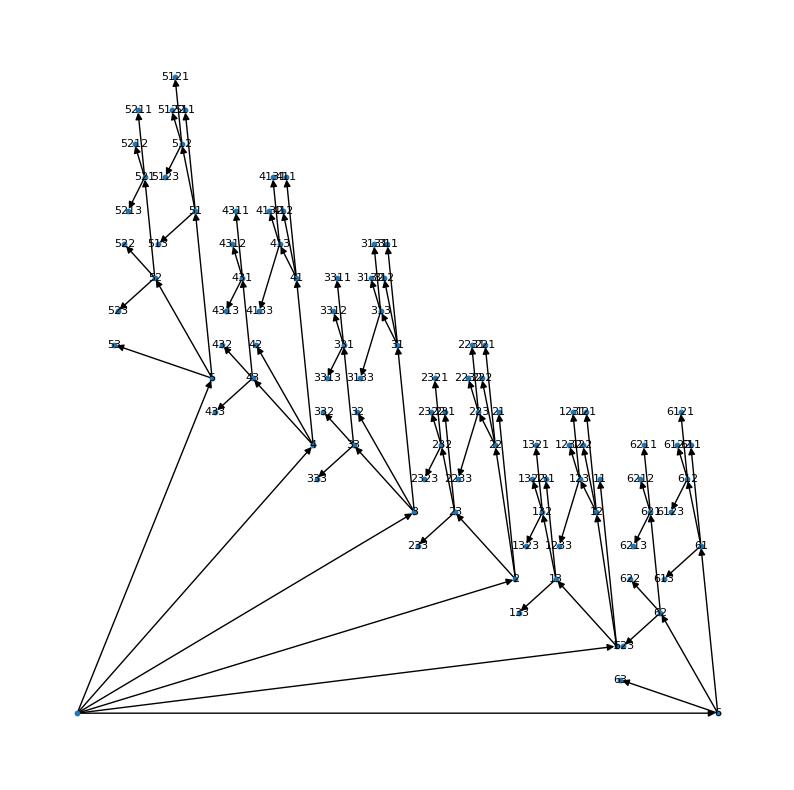

In [17]:
assert nx.is_tree(T)
fig, ax = plt.subplots(1,1, figsize=(10, 10))
nx.draw(
    T, 
    with_labels=True, 
#     font_weight="bold", 
    ax=ax, 
#     pos=nx.kamada_kawai_layout(T), 
    pos=nx.planar_layout(T), 
    node_size=10, 
    font_size=8,
)
# list(nx.topological_generations(T))

# Resolution map, Jacobian Matrix, RLCT

In [313]:
prev_chart = ''
for chart in nx.dfs_preorder_nodes(T, source=''):
    if chart == '':
        continue
    prev_chart = list(T.predecessors(chart))[0]
    rec = T.nodes[chart]
    subs = rec["subs"]
    rec["map"] = [(v, e.subs(subs)) for v, e in T.nodes[prev_chart]["map"]]

    print(chart, prev_chart)
    for x in rec["map"]:
        print(x)
    print()


1 
(a_1, a_1^(1))
(b_1, a_1^(1)*b_1^(1))
(a_2, a_1^(1)*a_2^(1))
(b_2, a_1^(1)*b_2^(1))

11 1
(a_1, a_1^(11))
(b_1, a_1^(11)*b_1^(11))
(a_2, a_1^(11)*a_2^(11)*b_1^(11))
(b_2, a_1^(11)*b_2^(11))

12 1
(a_1, a_1^(12))
(b_1, a_1^(12)*a_2^(12)*b_1^(12))
(a_2, a_1^(12)*a_2^(12))
(b_2, a_1^(12)*b_2^(12))

121 12
(a_1, a_1^(121))
(b_1, a_1^(121)*a_2^(121)*b_1^(121))
(a_2, a_1^(121)*a_2^(121))
(b_2, a_1^(121)*b_1^(121)*b_2^(121))

122 12
(a_1, a_1^(122))
(b_1, a_1^(122)*a_2^(122)*b_1^(122)*b_2^(122))
(a_2, a_1^(122)*a_2^(122))
(b_2, a_1^(122)*b_2^(122))

2 
(a_1, a_1^(2)*b_1^(2))
(b_1, b_1^(2))
(a_2, a_2^(2)*b_1^(2))
(b_2, b_1^(2)*b_2^(2))

21 2
(a_1, a_1^(21)*b_1^(21))
(b_1, b_1^(21))
(a_2, a_1^(21)*a_2^(21)*b_1^(21))
(b_2, b_1^(21)*b_2^(21))

22 2
(a_1, a_1^(22)*a_2^(22)*b_1^(22))
(b_1, b_1^(22))
(a_2, a_2^(22)*b_1^(22))
(b_2, b_1^(22)*b_2^(22))

221 22
(a_1, a_1^(221)*a_2^(221)*b_1^(221))
(b_1, b_1^(221))
(a_2, a_2^(221)*b_1^(221))
(b_2, a_1^(221)*b_1^(221)*b_2^(221))

222 22
(a_1, a_1^(222)

In [28]:
f = btree.f
K = btree.K

for chart in nx.dfs_preorder_nodes(T, source=''):
    rec = T.nodes[chart]
    m = rec["map"]
    expr = rec["expr"]
    var_list = rec["vars"]
    
    f_pullback = f.subs(m).factor()
    K_pullback = K.subs(m).factor()
    assert Eq(expand(expr - f_pullback), 0)
    is_nc = is_normal_crossing(f_pullback)
    J = get_jacobian_matrix(m, var_list)
    det = J.det()
    
    rec["is_normal_crossing"] = is_nc
    rec["J"] = J
    rec["det(J)"] = det
    rec["f_pullback"] = f_pullback
    
    if len(list(T.successors(chart))) == 0:
        print(f"\n-----------\nIs leaf. Is normal crossing? {is_nc}")
        display(Math(latex(f_pullback)))
        display(Math(latex(det)))

        rlcts = get_rlct(f_pullback, det)
        rec["rlcts"] = rlcts
        display(Math(f"RLCTS = {latex(rlcts)}"))
        display(Math(latex(J)))
        for x in m:
            display(Math(latex(Eq(x[0], x[1]))))
        
        display(Math(latex(K_pullback)))
        assert is_normal_crossing(K_pullback)


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


-----------
Is leaf. Is normal crossing? True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>